In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-tax-gnp-bd.csv')

In [4]:
df.head()

,YEAR,GDP,POPULATION,TAX
0,1980,1499.68,82.498,19.400
1,1981,1583.50,84.764,22.500
2,1982,1634.27,87.061,24.400
3,1983,1709.60,89.400,27.000
4,1984,1781.02,91.804,32.265


In [5]:
df.isnull().any()

YEAR          False
GDP           False
POPULATION    False
TAX           False
dtype: bool

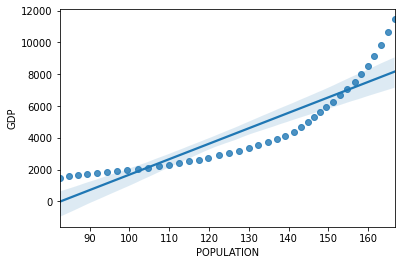

In [6]:
sns.regplot(x=df.POPULATION, y=df.GDP)

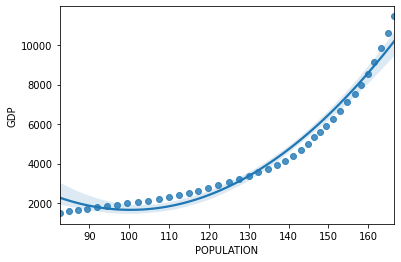

In [7]:
sns.regplot(x=df.POPULATION, y=df.GDP, data=df, order=2)

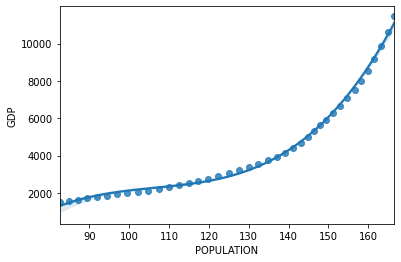

In [8]:
sns.regplot(x=df.POPULATION, y=df.GDP,data=df, order=3)

In [0]:
x = df['POPULATION'].values.reshape(-1,1)
y = df['GDP'].values.reshape(-1,1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3)
x_ = pf.fit_transform(x)
x_test_ = pf.fit_transform(x_test)

In [12]:
poly = LinearRegression()
poly.fit(x_, y)
poly.coef_

array([[ 0.00000000e+00,  1.20802698e+03, -1.11503188e+01,
         3.49081200e-02]])

In [0]:
#defining prediction data frame 
predictions = poly.predict(x_test_)

In [14]:
print('Coefficients:', poly.coef_)
print('Intercept:', poly.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = poly.score(x_test_,y_test)
print('AccuracyII:',accuracy*100,'%')

Coefficients: [[ 0.00000000e+00  1.20802698e+03 -1.11503188e+01  3.49081200e-02]]
Intercept: [-42077.21061267]
MAE: 97.78921718116324
MSE: 18572.673130666182
RMSE: 136.28159498137003
AccuracyII: 99.76117210173993 %


In [15]:
x=['200']
x

['200']

In [16]:
yhat= {'POPULATION':['200']}
yhatDf = pd.DataFrame(yhat)
yhatDfReshape=yhatDf['POPULATION'].values.reshape(-1,1)

polyFit = pf.fit_transform(yhatDfReshape)

poly.predict(polyFit)

array([[32780.39276548]])

In [18]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

predictionsLN = linreg.predict(x_test)

print('Coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictionsLN))
print('MSE:', metrics.mean_squared_error(y_test, predictionsLN))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictionsLN)))
accuracy = linreg.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')

Coefficients: [[100.14883252]]
Intercept: [-8431.28106286]
MAE: 1299.7312045114136
MSE: 2155272.718388882
RMSE: 1468.0847109035915
AccuracyII: 72.28512826943646 %
